In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import composition as comp

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
feature_list, feature_labels = comp.get_training_features()

In [3]:
pipeline_str = 'xgboost'
scoring = 'accuracy'
cv = 10

In [4]:
sfs = pd.read_csv('SFS-results/{}_forward_nofloat_{}_cv{}.csv'.format(pipeline_str, scoring, cv))
sffs = pd.read_csv('SFS-results/{}_forward_floating_{}_cv{}.csv'.format(pipeline_str, scoring, cv))
sbs = pd.read_csv('SFS-results/{}_backward_nofloat_{}_cv{}.csv'.format(pipeline_str, scoring, cv))
sfbs = pd.read_csv('SFS-results/{}_backward_floating_{}_cv{}.csv'.format(pipeline_str, scoring, cv))

In [5]:
sfs

,Unnamed: 0,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
0,1,0.615184,0.002381,[ 0.61324942 0.62146406 0.61371315 0.609738...,"(12,)",0.003206,0.001069
1,2,0.770208,0.002141,[ 0.76442531 0.76787016 0.77250745 0.773964...,"(9, 12)",0.002882,0.000961
2,3,0.777038,0.002104,[ 0.77310368 0.7736999 0.77793972 0.782378...,"(9, 12, 5)",0.002833,0.000944
3,4,0.780642,0.002175,[ 0.77575356 0.77913216 0.78032461 0.783040...,"(9, 12, 5, 4)",0.002928,0.000976
4,5,0.782477,0.002080,[ 0.77827095 0.7783372 0.78403445 0.785226...,"(9, 2, 12, 5, 4)",0.002800,0.000933
5,6,0.783491,0.002046,[ 0.77873468 0.77972839 0.78363697 0.786684...,"(1, 2, 4, 5, 9, 12)",0.002754,0.000918
6,7,0.784206,0.002183,[ 0.77899967 0.77999338 0.78482941 0.787810...,"(1, 2, 4, 5, 9, 12, 14)",0.002940,0.000980
7,8,0.784511,0.001996,[ 0.77966214 0.78078834 0.78376946 0.787810...,"(1, 2, 4, 5, 9, 11, 12, 14)",0.002687,0.000896
8,9,0.784564,0.002013,[ 0.77966214 0.78025836 0.78575687 0.788075...,"(0, 1, 2, 4, 5, 9, 11, 12, 14)",0.002710,0.000903
9,10,0.784564,0.002028,[ 0.77959589 0.78025836 0.78575687 0.788141...,"(0, 1, 2, 4, 5, 6, 9, 11, 12, 14)",0.002731,0.000910


/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


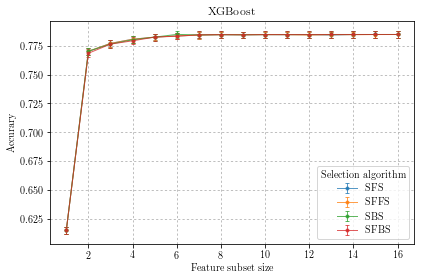

In [6]:
selector_list = [sfs, sffs, sbs, sfbs]
selector_label = ['SFS', 'SFFS', 'SBS', 'SFBS']
fig, ax = plt.subplots()
for idx, selector in enumerate(selector_list):
    scores = [row['avg_score'] for index, row in selector.iterrows()]
    errs = [row['std_dev'] for index, row in selector.iterrows()]
    ax.errorbar(range(1, len(selector)+1), scores, yerr=errs,
                marker='.', linestyle='-', lw=1, alpha=0.75,
                label=selector_label[idx])
plt.xlabel('Feature subset size')
plt.ylabel('Accurary')
plt.title('XGBoost')
plt.grid()
plt.legend(title='Selection algorithm', loc='lower right')
plt.show()

In [15]:
k_features = 8
for idx, selector in enumerate(selector_list):
    indices_str = selector['feature_idx'][k_features-1]
    indices_str = indices_str.replace('(','')
    indices_str = indices_str.replace(')','')
    indices_str = indices_str.replace(',','')
    indices = [int(i) for i in indices_str.split()]
    print(selector_label[idx]+': (k = {})'.format(k_features))
    indices = [int(i) for i in indices_str.split()]
    print(np.sort(feature_labels[list(indices)]))

SFS: (k = 8)
['$\\cos(\\theta_{\\mathrm{Lap}})$' '$\\log_{10}$(NChannels (top 50\\%))'
 '$\\log_{10}$(NHits (top 50\\%))' '$\\log_{10}(S_{\\mathrm{500}})$'
 '$\\log_{10}(S_{\\mathrm{50}})$' '$r\\log_{10}(l)$'
 'Num HE stochastics (standard)' 'dE/dX (standard)']
SFFS: (k = 8)
['$\\cos(\\theta_{\\mathrm{Lap}})$' '$\\log_{10}$(NChannels (top 50\\%))'
 '$\\log_{10}$(NHits (top 50\\%))' '$\\log_{10}(S_{\\mathrm{500}})$'
 '$\\log_{10}(S_{\\mathrm{50}})$' '$r\\log_{10}(l)$'
 'Num HE stochastics (standard)' 'dE/dX (standard)']
SBS: (k = 8)
['$\\cos(\\theta_{\\mathrm{Lap}})$' '$\\log_{10}$(NChannels (top 50\\%))'
 '$\\log_{10}(E_{\\mathrm{Lap}}/\\mathrm{GeV})$'
 '$\\log_{10}(S_{\\mathrm{50}})$' '$r\\log_{10}(l)$' 'NChannels/NHits'
 'Num HE stochastics (standard)' 'dE/dX (standard)']
SFBS: (k = 8)
['$\\cos(\\theta_{\\mathrm{Lap}})$' '$\\log_{10}$(NChannels (top 50\\%))'
 '$\\log_{10}(E_{\\mathrm{Lap}}/\\mathrm{GeV})$'
 '$\\log_{10}(S_{\\mathrm{50}})$' '$r\\log_{10}(l)$' 'NChannels/NHits'
 'Num H